In [5]:
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import gamma

import pandas as pd
import matplotlib.pyplot as plt

# Bernoulli, Binomial, Poisson, Gamma

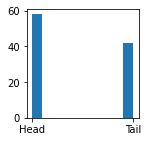

In [67]:
plt.figure(figsize=(2,2))
plt.hist([["Head", "Tail"][int(nr)] for nr in bernoulli.rvs(p=0.5, size=100)])
plt.show()

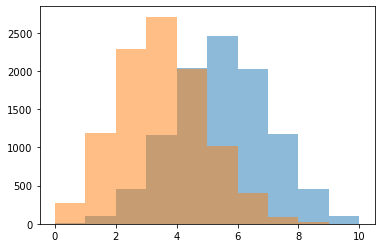

In [64]:
plt.hist(binom.rvs(n=10, p=0.5, size=10000), alpha=0.5)
plt.hist(binom.rvs(n=10, p=0.3, size=10000), alpha=0.5)
plt.show()

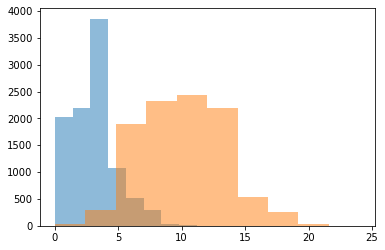

In [70]:
plt.hist(poisson.rvs(mu=3, size=10000), alpha=0.5)
plt.hist(poisson.rvs(mu=10, size=10000), alpha=0.5)
plt.show()

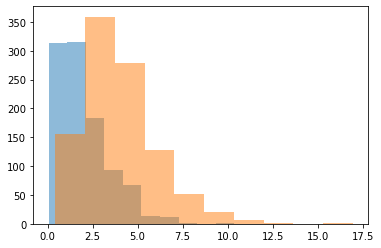

In [75]:
plt.hist(gamma.rvs(1.99, size=1000).round(2), alpha=0.5)
plt.hist(gamma.rvs(4, size=1000).round(2), alpha=0.5)
plt.show()

# Read RData

In [3]:
# https://stackoverflow.com/questions/47833692/converting-rda-to-pandas-dataframe
# https://github.com/bnicenboim/bcogsci
! pip install pyreadr
import pyreadr

In [6]:
df_spacebar = pyreadr.read_r("https://github.com/bnicenboim/bcogsci/raw/master/data/df_spacebar.rda")
df_spacebar

PyreadrError: File b'https://github.com/bnicenboim/bcogsci/raw/master/data/df_spacebar.rda' does not exist!

In [7]:
! pip install feather-format
import feather

In [8]:
datafile = feather.read_dataframe("https://github.com/bnicenboim/bcogsci/raw/master/data/df_spacebar.rda")

FileNotFoundError: [Errno 2] Failed to open local file 'https://github.com/bnicenboim/bcogsci/raw/master/data/df_spacebar.rda'. Detail: [errno 2] No such file or directory

In [9]:
! wget "https://github.com/bnicenboim/bcogsci/raw/master/data/df_spacebar.rda"

--2023-02-12 18:59:58--  https://github.com/bnicenboim/bcogsci/raw/master/data/df_spacebar.rda
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bnicenboim/bcogsci/master/data/df_spacebar.rda [following]
--2023-02-12 18:59:58--  https://raw.githubusercontent.com/bnicenboim/bcogsci/master/data/df_spacebar.rda
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1066 (1.0K) [application/octet-stream]
Saving to: ‘df_spacebar.rda’

df_spacebar.rda     100%[===================>]   1.04K  --.-KB/s    in 0s      

2023-02-12 18:59:59 (28.7 MB/s) - ‘df_spacebar.rda’ saved [1066/1066]



In [11]:
df_spacebar = pyreadr.read_r("/kaggle/working/df_spacebar.rda")
df_spacebar

OrderedDict([('df_spacebar',
                    rt  trial
              0    141      1
              1    138      2
              2    128      3
              3    132      4
              4    126      5
              ..   ...    ...
              356  182    357
              357  179    358
              358  177    359
              359  183    360
              360  162    361
              
              [361 rows x 2 columns])])

In [12]:
datafile = feather.read_dataframe("/kaggle/working/df_spacebar.rda")
datafile

ArrowInvalid: Not a Feather V1 or Arrow IPC file

# Spacebar Dataset

In [22]:
# df_spacebar = df_spacebar["df_spacebar"]
df_spacebar

,rt,trial
0,141,1
1,138,2
2,128,3
3,132,4
4,126,5
...,...,...
356,182,357
357,179,358
358,177,359
359,183,360


<AxesSubplot:>

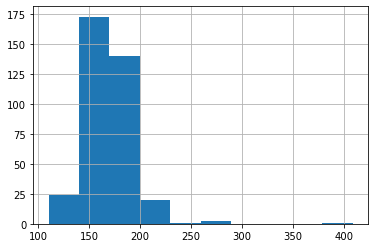

In [25]:
df_spacebar.rt.hist()

<AxesSubplot:xlabel='rt', ylabel='Density'>

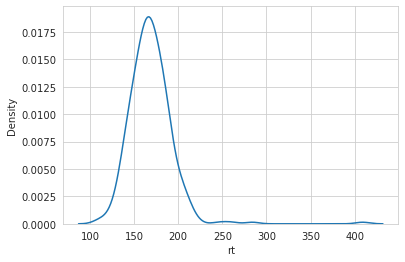

In [27]:
# https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
sns.kdeplot(df_spacebar.rt)

In [29]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# Linear Model

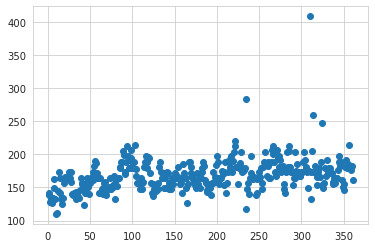

In [40]:
plt.scatter(df_spacebar.trial, df_spacebar.rt)

In [43]:
reg = LinearRegression().fit(np.array(df_spacebar.trial).reshape(-1, 1), df_spacebar.rt)
reg.intercept_

152.53467220683288

In [48]:
df_spacebar.rt.std().round(4)

24.9118

In [45]:
df_spacebar.rt.mean().round(4)

168.6399

# Bayesian Model

In [49]:
# https://github.com/adamhaber/pybrms
! pip install pybrms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.2/214.2 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Unable to determine R home: [Errno 2] No such file or directory: 'R': 'R'
      cffi mode is CFFI_MODE.ANY
      Looking for R home with: R RHOME
      Unable to determine R home: [Errno 2] No such file or directory: 'R': 'R'
      R home found: None
      Error: rpy2 in API mode cannot be built without R in the PATH or R_HOME defined. Correct this or force ABI mode-only by defining the environment variable RPY2_CFFI_MODE=ABI
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See

In [51]:
! pip install pymc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.1/543.1 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cons: filename=cons-0.4.5-py3-none-any.whl size=9118 sha256=e80bbfca3aac5fcb13c9aa1bd66e66235107974f17a0fe8ffca609920ca728e8
  Stored in directory: /root/.cache/pip/wheels/82/c9/59/093d33254965d43748af10c13bb61e38599a88ce0885030d10
  Created wheel for logical-unification: filename=logical_unification-0.4.5-py3-none-any.whl size=13772 sha256=c7b27cb899f6422e355d4c3fbe695909b53cf8c2067ff65cc181e7d12e56b0c6
  Stored in directory: /root/.cache/pip/wheels/e7/f3/fc/78701993d9639b

In [52]:
# https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/GLM_linear.html
import arviz as az
import pymc as pm
import xarray as xr

from pymc import HalfCauchy, Model, Normal, sample

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.1.4


In [53]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [55]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

data = pd.DataFrame(dict(x=x, y=y))
data

,x,y
0,0.000000,0.819940
1,0.005025,0.929210
2,0.010050,1.557529
3,0.015075,0.985873
4,0.020101,1.020914
...,...,...
195,0.979899,2.674029
196,0.984925,3.081896
197,0.989950,2.594432
198,0.994975,3.590640


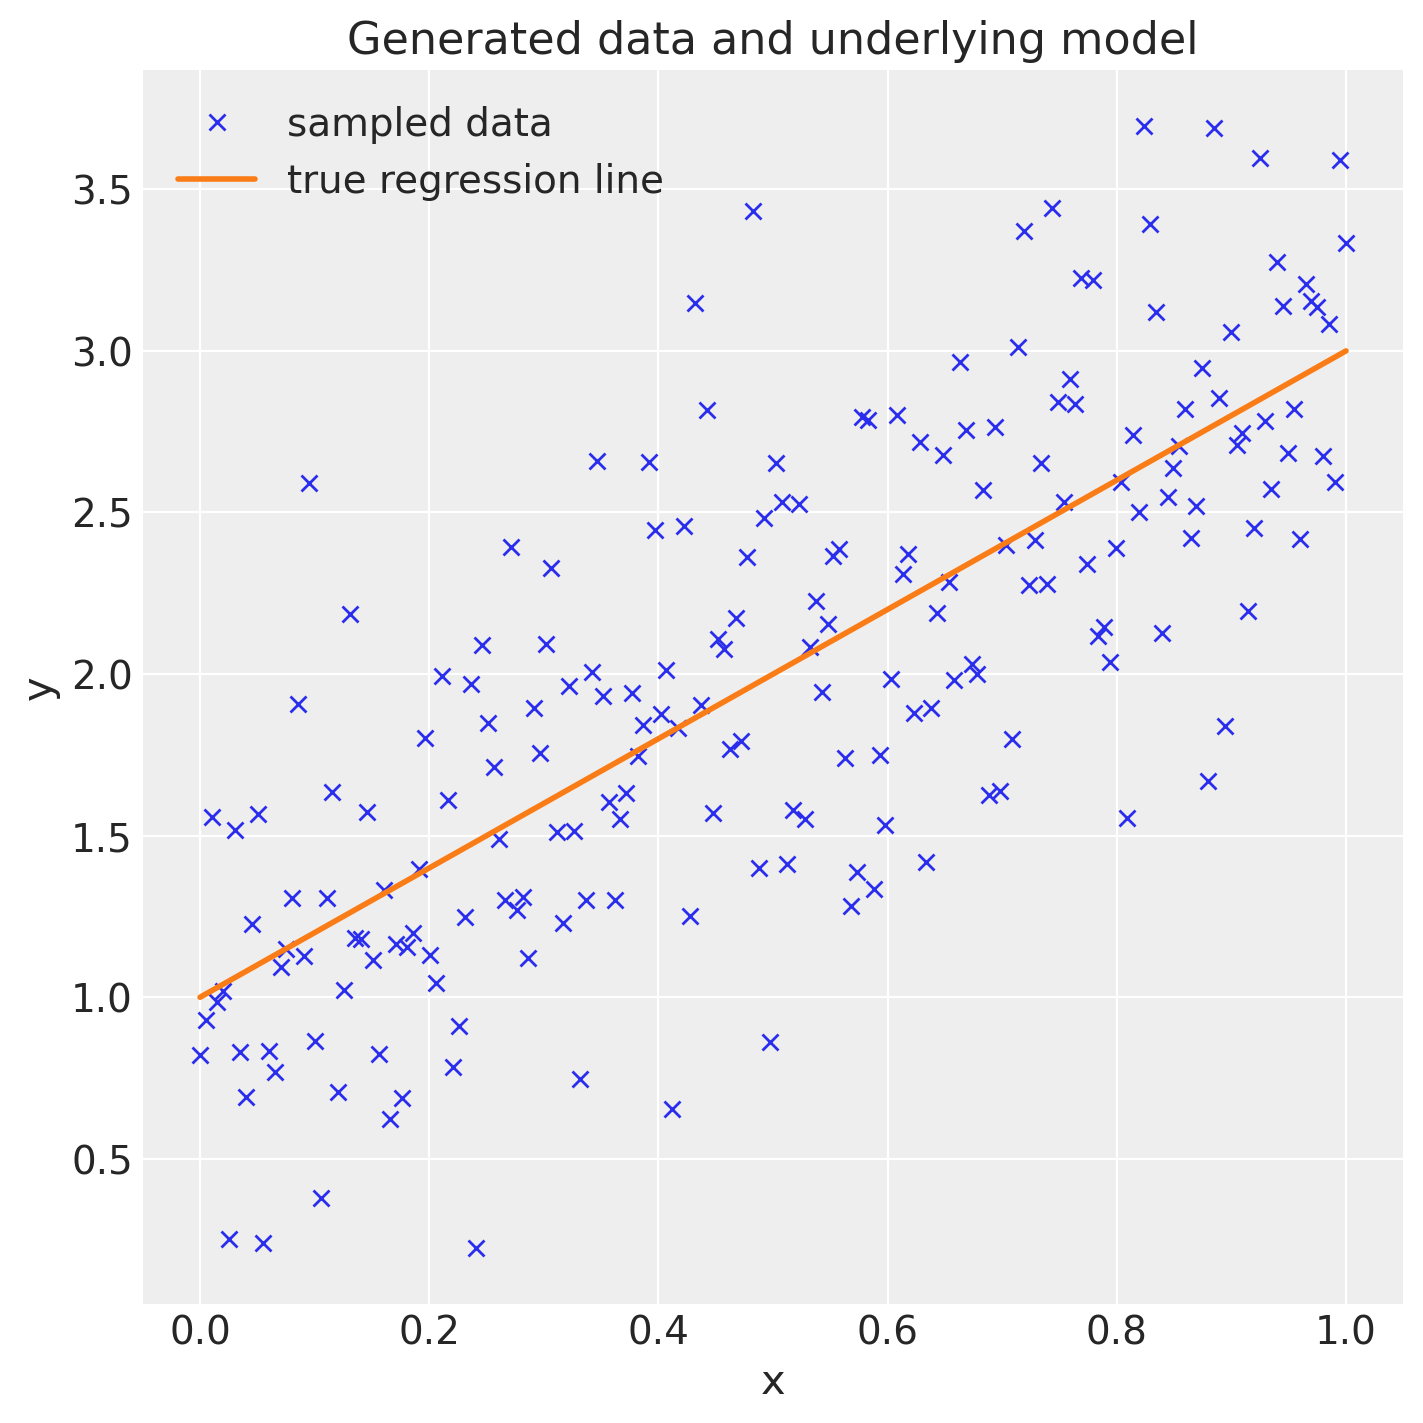

In [56]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

In [57]:
with Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=10)
    intercept = Normal("Intercept", 0, sigma=20)
    slope = Normal("slope", 0, sigma=20)

    # Define likelihood
    likelihood = Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = sample(3000)

In [58]:
# NOTE: Until bambi has released an update compatible with PyMC 5.0.0, this and the following cells remain disabled.

import sys

try:
    import bambi as bmb
except ImportError:
    !{sys.executable} -m pip install --upgrade bambi
    import bambi as bmb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 485.5 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.9 MB/s eta 0:00:00


In [60]:
model = bmb.Model("y ~ x", data)
idata = model.fit(draws=3000)

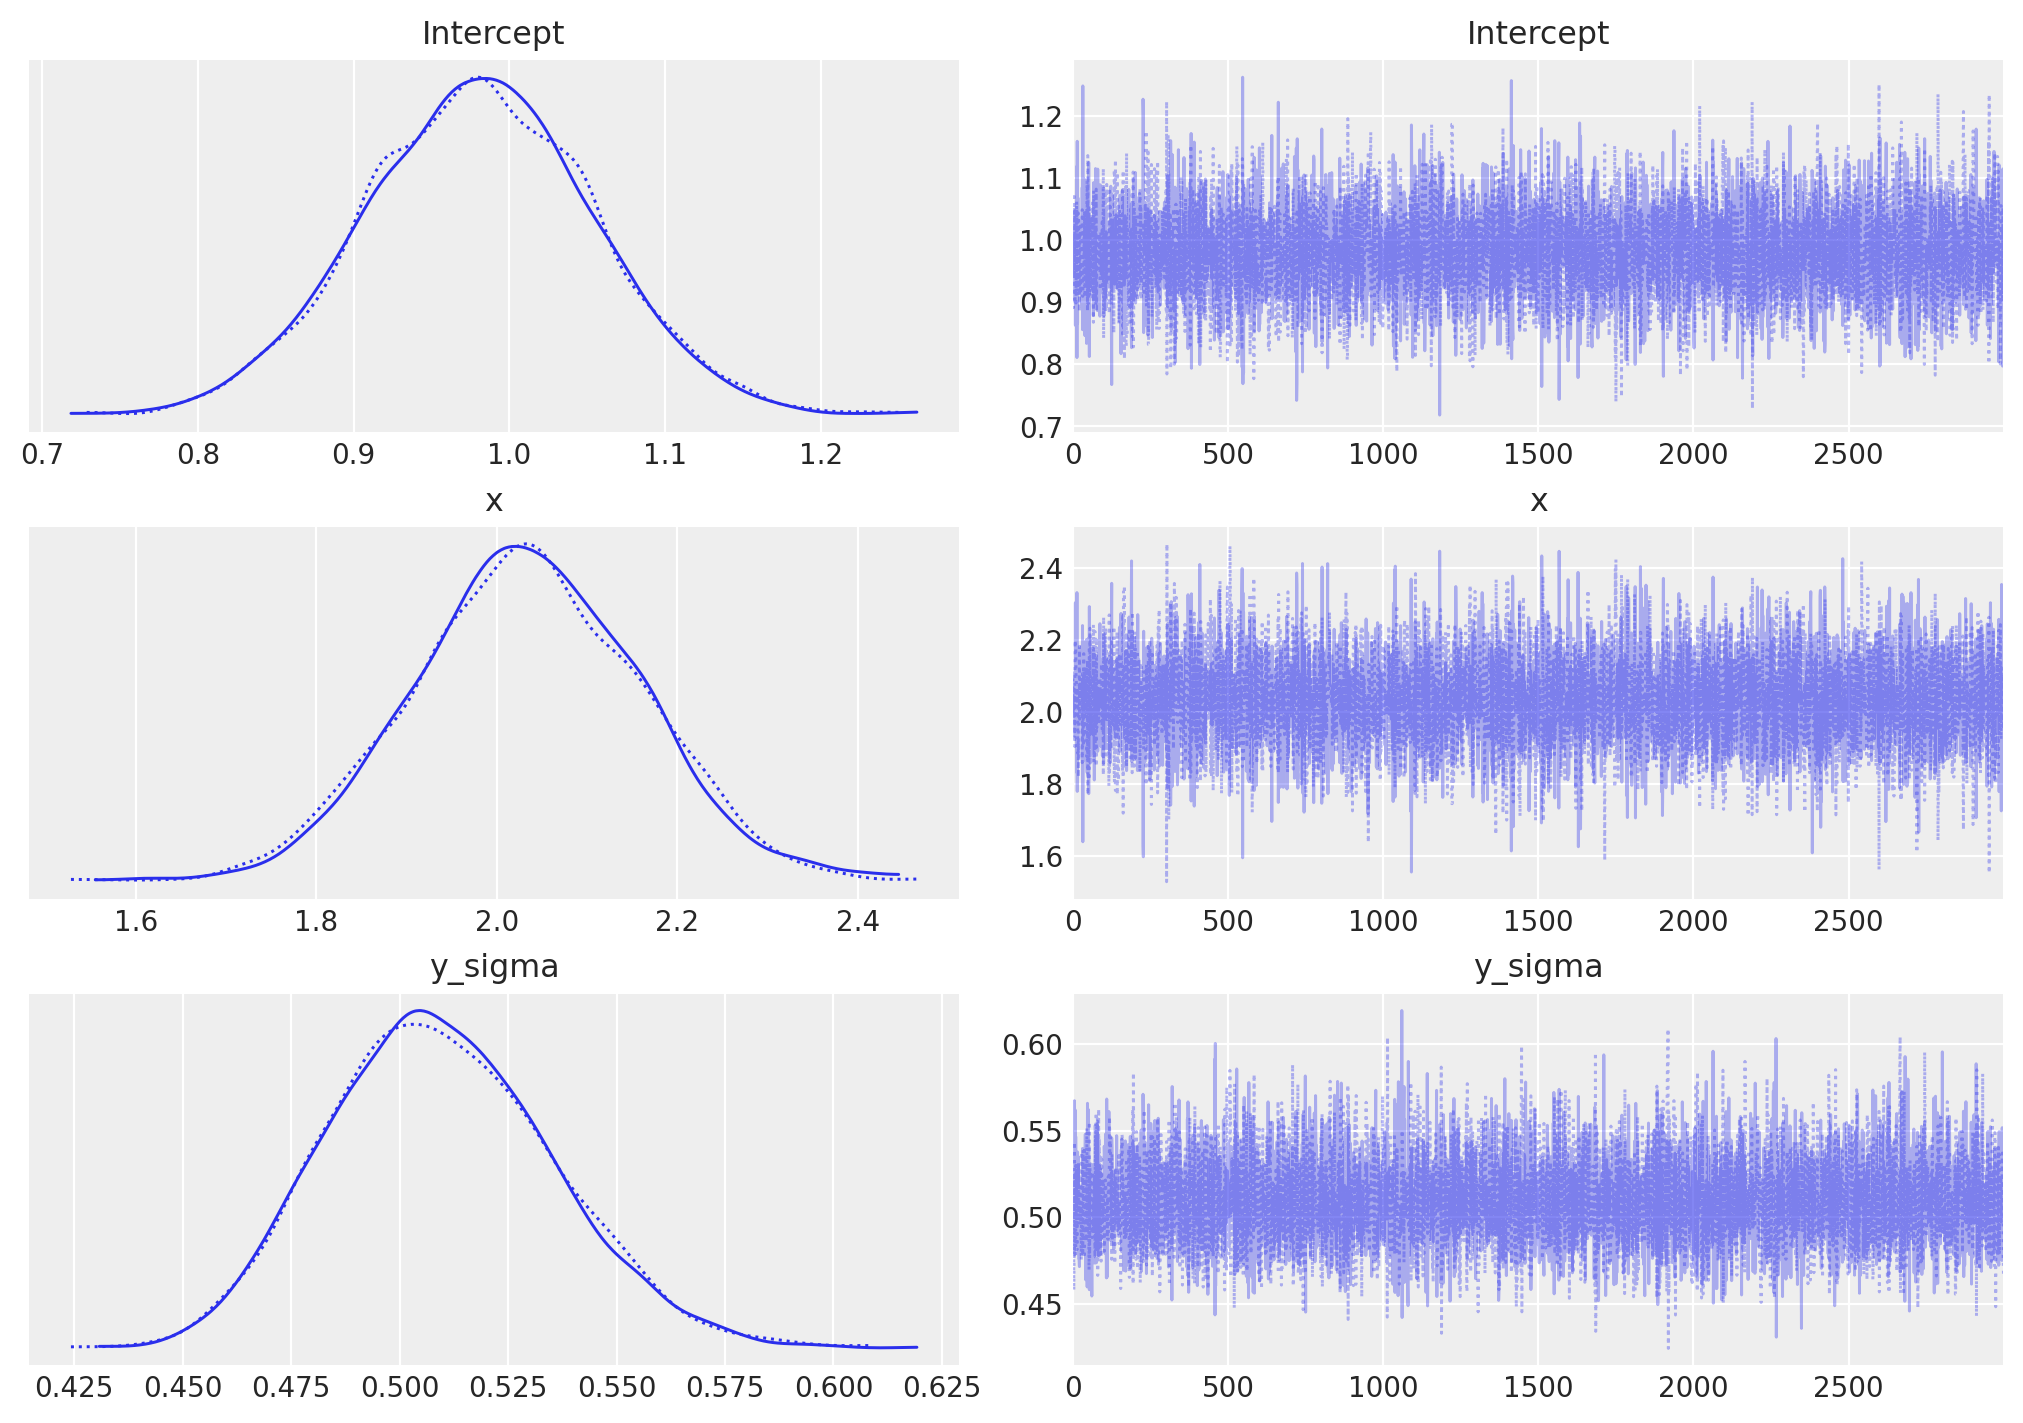

In [61]:
az.plot_trace(idata, figsize=(10, 7));

In [62]:
idata.posterior["y_model"] = idata.posterior["Intercept"] + idata.posterior["x"] * xr.DataArray(x)

/opt/conda/lib/python3.7/site-packages/arviz/plots/lmplot.py:209: UserWarning: posterior_predictive not found in idata
  warnings.warn("posterior_predictive not found in idata", UserWarning)
/opt/conda/lib/python3.7/site-packages/numpy/lib/shape_base.py:1250: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = _nx.array(A, copy=False, subok=True, ndmin=d)


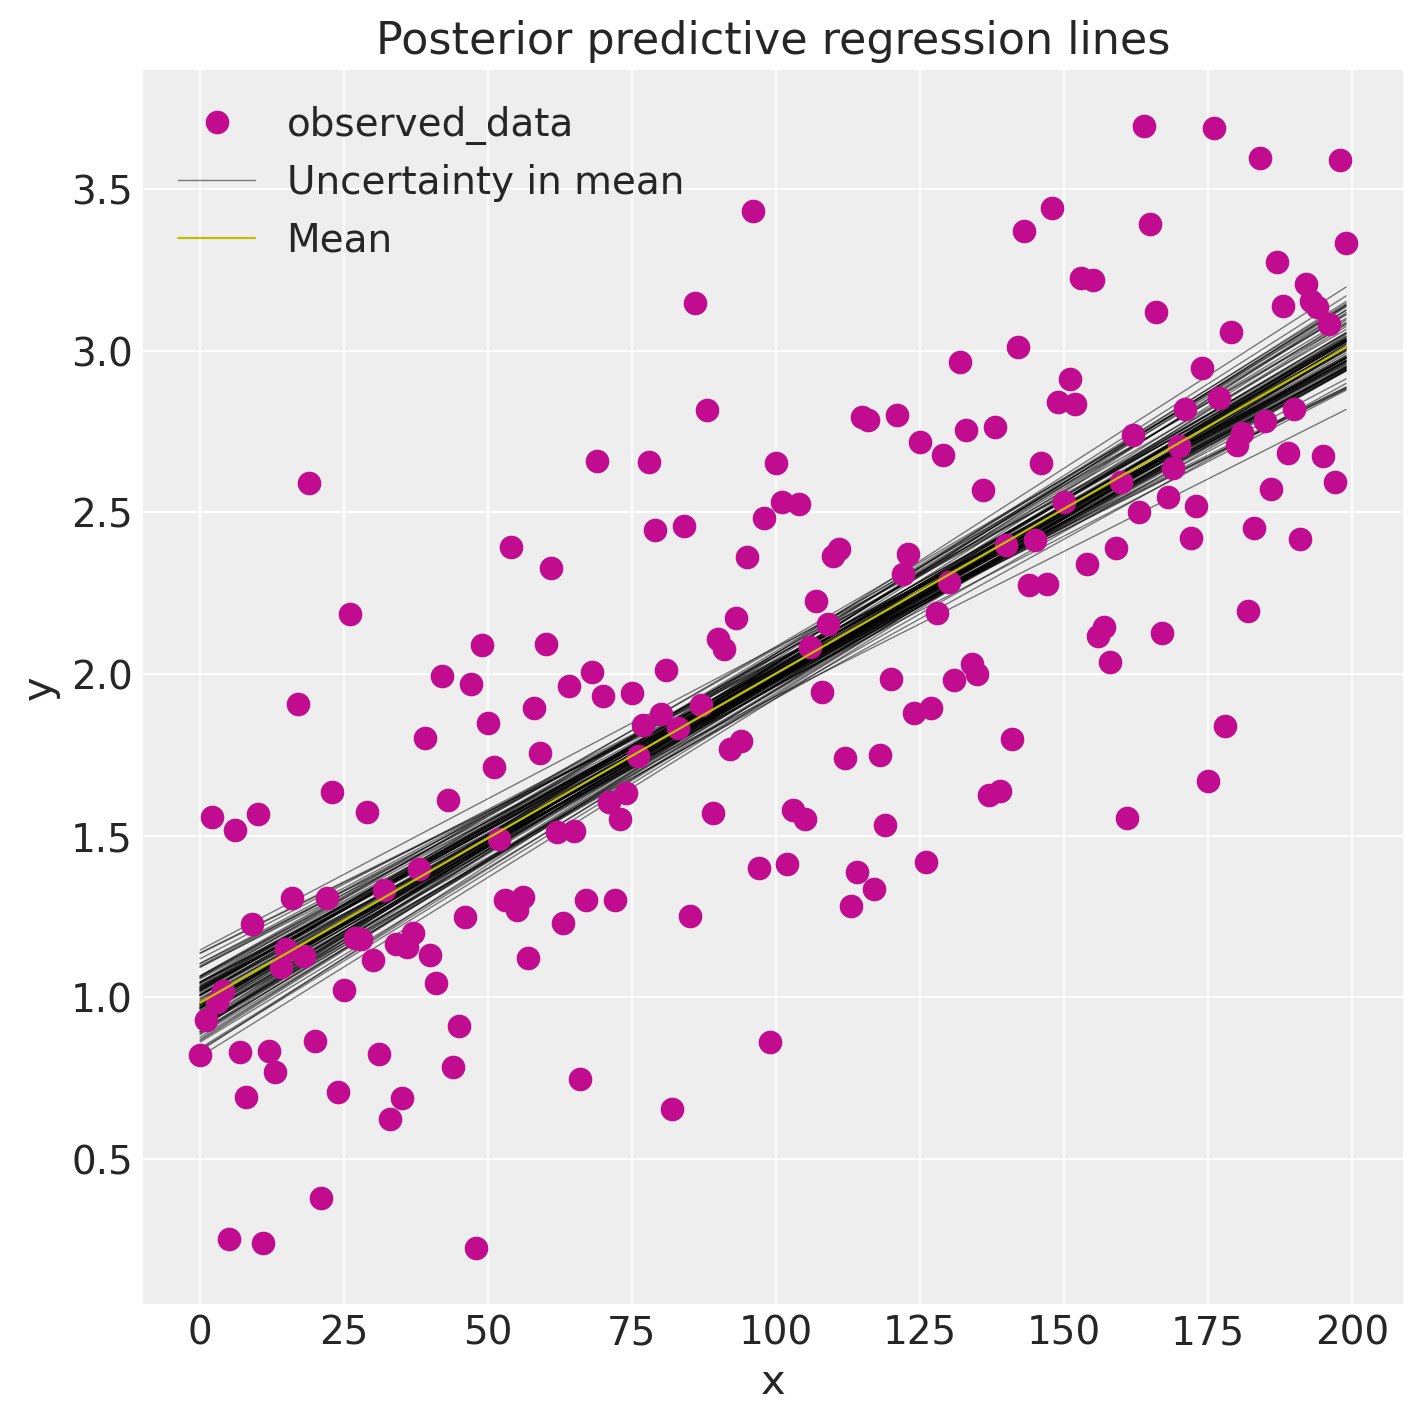

In [63]:
_, ax = plt.subplots(figsize=(7, 7))
az.plot_lm(idata=idata, y="y", num_samples=100, axes=ax, y_model="y_model")
ax.set_title("Posterior predictive regression lines")
ax.set_xlabel("x");

In [65]:
with Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define priors
    sigma = Gaussian("sigma", beta=10)
    intercept = Normal("Intercept", 0, sigma=20)
    slope = Normal("slope", 0, sigma=20)

    # Define likelihood
    likelihood = Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = sample(3000)
    
model = bmb.Model("trial ~ rt", df_spacebar)
idata = model.fit(draws=3000)

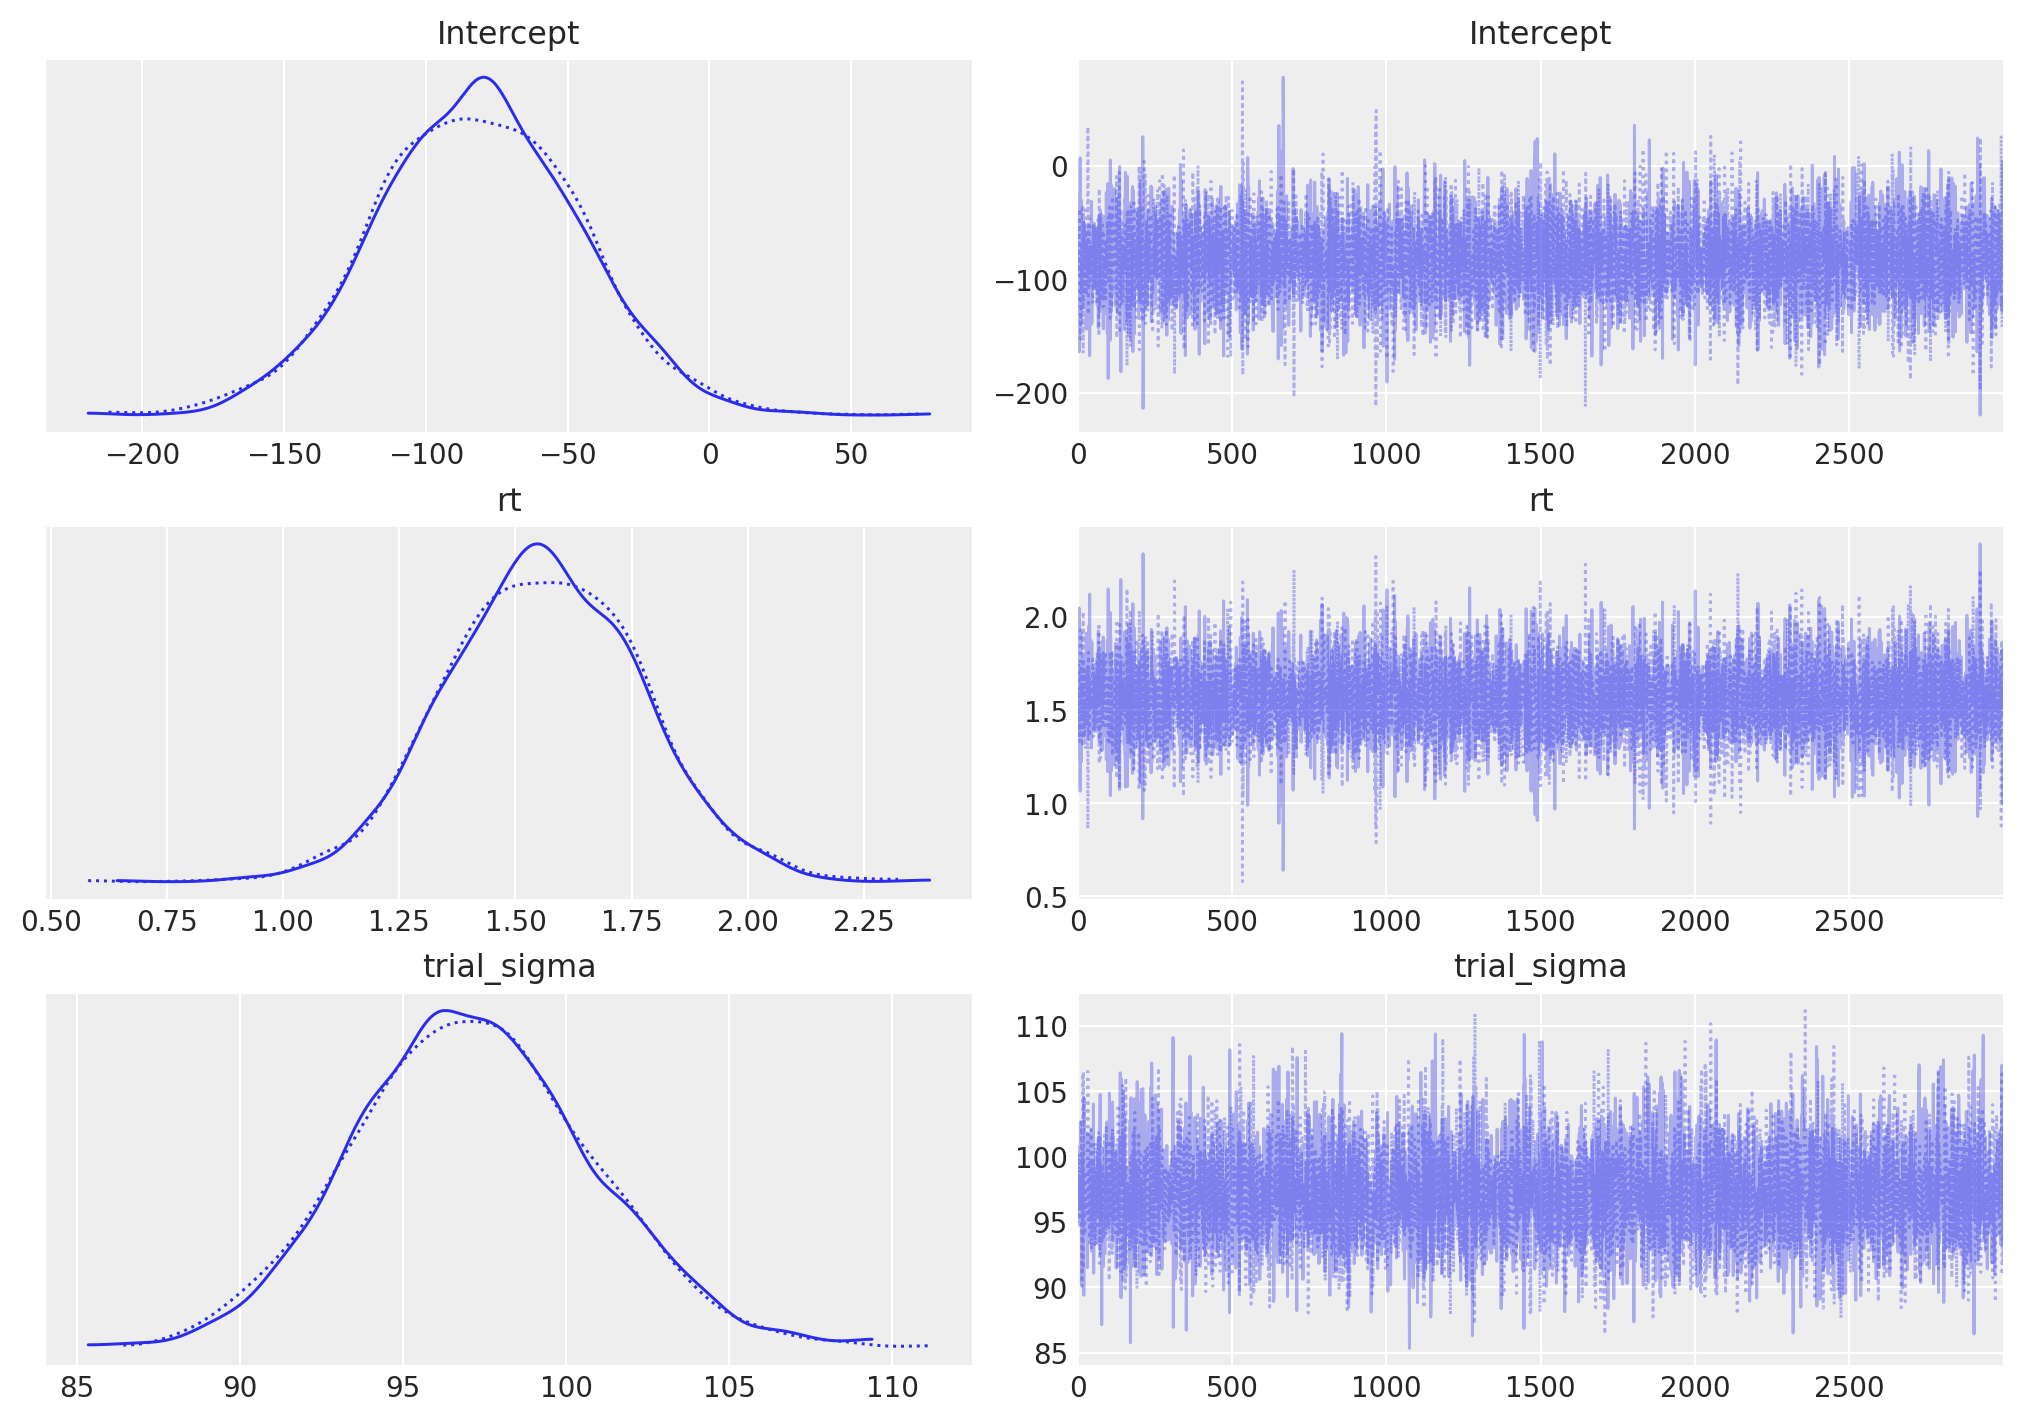

In [66]:
az.plot_trace(idata, figsize=(10, 7));